In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# File to Load 
EPL_sum_table = "Data/EPL_all_seasons_sum.csv"
EPL_matches_table = "Data/EPL_all_seasons_matches.csv"
LaLiga_sum_table = "Data/LaLiga_all_seasons_sum.csv"
LaLiga_matches_table = "Data/LaLiga_all_seasons_matches.csv"
SerieA_sum_table = "Data/serie_a_seasons_sum.csv"
SerieA_matches_table = "Data/serie_a_all_seasons_matches.csv"
Bundes_sum_table = "Data/Bundes_seasonsdata.csv"
Bundes_matches_table = "Data/combined_bundesliga_matches.csv"
Ligue1_sum_table = "Data/Ligue1_all_seasons_sum.csv"
Ligue1_matches_table = "Data/Ligue1_all_seasons_matches.csv"
UEFA_sum_table = "Data/uefa_all_seasons_sum.csv"
UEFA_matches_table = "Data/uefa_all_seasons_matches.csv"

# Read csv files and store into Pandas DataFrames
EPL_sum_df = pd.read_csv(EPL_sum_table, index_col=0)
EPL_matches_df = pd.read_csv(EPL_matches_table, index_col=0)
LaLiga_sum_df = pd.read_csv(LaLiga_sum_table, index_col=0)
LaLiga_matches_df = pd.read_csv(LaLiga_matches_table, index_col=0)
SerieA_sum_df = pd.read_csv(SerieA_sum_table, index_col=0)
SerieA_matches_df = pd.read_csv(SerieA_matches_table, index_col=0)
Bundes_sum_df = pd.read_csv(Bundes_sum_table, index_col=0)
Bundes_matches_df = pd.read_csv(Bundes_matches_table, index_col=0)
Ligue1_sum_df = pd.read_csv(Ligue1_sum_table, index_col=0)
Ligue1_matches_df = pd.read_csv(Ligue1_matches_table, index_col=0)
UEFA_sum_df = pd.read_csv(UEFA_sum_table, index_col=0)
UEFA_matches_df = pd.read_csv(UEFA_matches_table, index_col=0)

In [3]:
# Concatenate summary tables into one dataframe
all_leagues_sum_df = pd.concat([EPL_sum_df, LaLiga_sum_df, SerieA_sum_df,
                                Bundes_sum_df, Ligue1_sum_df], axis=0).reset_index(drop=True)
all_leagues_sum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            486 non-null    object 
 1   League Rank       474 non-null    float64
 2   Squad             486 non-null    object 
 3   # of Players      474 non-null    float64
 4   Avg Age           486 non-null    float64
 5   Avg Poss          486 non-null    float64
 6   MP                486 non-null    int64  
 7   W                 486 non-null    int64  
 8   D                 486 non-null    int64  
 9   L                 486 non-null    int64  
 10  GF                486 non-null    int64  
 11  GA                486 non-null    int64  
 12  GD                486 non-null    int64  
 13  Pts               486 non-null    int64  
 14  Pts/MP            486 non-null    float64
 15  xG                486 non-null    float64
 16  xGA               486 non-null    float64
 1

In [4]:
# Concatenate matches into one dataframe
all_leagues_matches_df = pd.concat([EPL_matches_df, LaLiga_matches_df, SerieA_matches_df,
                                Bundes_matches_df, Ligue1_matches_df, UEFA_matches_df], axis=0).reset_index(drop=True)
all_leagues_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       9656 non-null   object 
 1   Wk           9504 non-null   float64
 2   Date         9656 non-null   object 
 3   Time         9656 non-null   object 
 4   Home         9656 non-null   object 
 5   Away         9656 non-null   object 
 6   Home Score   9656 non-null   float64
 7   Away Score   9656 non-null   float64
 8   xG Home      9641 non-null   float64
 9   xG Away      9641 non-null   float64
 10  Attendance   7376 non-null   float64
 11  Venue        9656 non-null   object 
 12  Referee      9643 non-null   object 
 13  xG Diff      9641 non-null   float64
 14  Actual Diff  9656 non-null   float64
 15  League       9656 non-null   object 
 16  Round        619 non-null    object 
dtypes: float64(8), object(9)
memory usage: 1.3+ MB


In [5]:
# Remove rows where score data is missing
rows_to_remove = all_leagues_matches_df[all_leagues_matches_df['Home Score'].isna()].index
rows_to_remove
all_leagues_matches_cleaned_df = all_leagues_matches_df.drop(rows_to_remove, axis=0)
all_leagues_matches_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       9656 non-null   object 
 1   Wk           9504 non-null   float64
 2   Date         9656 non-null   object 
 3   Time         9656 non-null   object 
 4   Home         9656 non-null   object 
 5   Away         9656 non-null   object 
 6   Home Score   9656 non-null   float64
 7   Away Score   9656 non-null   float64
 8   xG Home      9641 non-null   float64
 9   xG Away      9641 non-null   float64
 10  Attendance   7376 non-null   float64
 11  Venue        9656 non-null   object 
 12  Referee      9643 non-null   object 
 13  xG Diff      9641 non-null   float64
 14  Actual Diff  9656 non-null   float64
 15  League       9656 non-null   object 
 16  Round        619 non-null    object 
dtypes: float64(8), object(9)
memory usage: 1.3+ MB


In [6]:
# Get matches where fans were present
attendance_df = all_leagues_matches_cleaned_df.loc[all_leagues_matches_cleaned_df["Attendance"] > 0, :]
attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7376 entries, 0 to 9655
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       7376 non-null   object 
 1   Wk           7270 non-null   float64
 2   Date         7376 non-null   object 
 3   Time         7376 non-null   object 
 4   Home         7376 non-null   object 
 5   Away         7376 non-null   object 
 6   Home Score   7376 non-null   float64
 7   Away Score   7376 non-null   float64
 8   xG Home      7368 non-null   float64
 9   xG Away      7368 non-null   float64
 10  Attendance   7376 non-null   float64
 11  Venue        7376 non-null   object 
 12  Referee      7368 non-null   object 
 13  xG Diff      7368 non-null   float64
 14  Actual Diff  7376 non-null   float64
 15  League       7376 non-null   object 
 16  Round        503 non-null    object 
dtypes: float64(8), object(9)
memory usage: 1.0+ MB


In [7]:
# Get matches where home team won
home_wins_df = attendance_df.loc[attendance_df["Home Score"] > attendance_df["Away Score"], :]
len(home_wins_df)

3270

In [8]:
# Get matches where away team won
away_wins_df = attendance_df.loc[attendance_df["Home Score"] < attendance_df["Away Score"], :]
len(away_wins_df)

2266

In [9]:
# Get matches that ended in a draw
draws_df = attendance_df.loc[attendance_df["Home Score"] == attendance_df["Away Score"], :]
len(draws_df)

1840

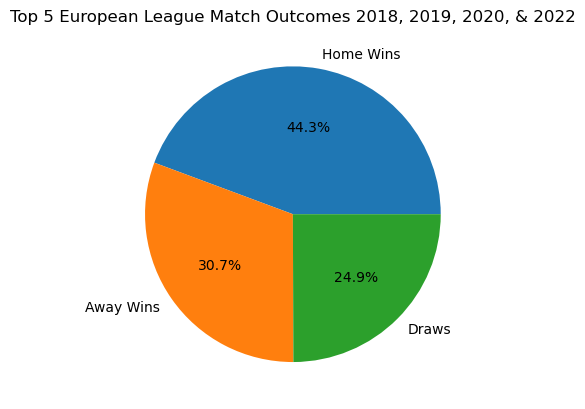

In [10]:
# Calculate % occurance of win/loss/draw
home_win_pct = (len(home_wins_df)/len(attendance_df['Home Score']))
away_win_pct = (len(away_wins_df)/len(attendance_df['Home Score']))
draw_pct = (len(draws_df)/len(attendance_df['Home Score']))

# Generate pie chart to display results
labels =  ['Home Wins', 'Away Wins', 'Draws']
values = home_win_pct, away_win_pct, draw_pct 

plt.title("Top 5 European League Match Outcomes 2018, 2019, 2020, & 2022")
plt.pie(values, labels=labels ,autopct='%1.1f%%')
plt.show()

In [11]:
# Get matches where attendance was 0 
covid_season_df = all_leagues_matches_cleaned_df.loc[all_leagues_matches_cleaned_df["Attendance"].isna()]
covid_season_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 1048 to 9625
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       2280 non-null   object 
 1   Wk           2234 non-null   float64
 2   Date         2280 non-null   object 
 3   Time         2280 non-null   object 
 4   Home         2280 non-null   object 
 5   Away         2280 non-null   object 
 6   Home Score   2280 non-null   float64
 7   Away Score   2280 non-null   float64
 8   xG Home      2273 non-null   float64
 9   xG Away      2273 non-null   float64
 10  Attendance   0 non-null      float64
 11  Venue        2280 non-null   object 
 12  Referee      2275 non-null   object 
 13  xG Diff      2273 non-null   float64
 14  Actual Diff  2280 non-null   float64
 15  League       2280 non-null   object 
 16  Round        116 non-null    object 
dtypes: float64(8), object(9)
memory usage: 320.6+ KB


In [12]:
# Get matches where home team won during 2020-2021 season
home_wins_2_df = covid_season_df.loc[covid_season_df["Home Score"] > covid_season_df["Away Score"], :]
len(home_wins_2_df)

916

In [13]:
# Get matches where away team won during 2020-2021 season
away_wins_2_df = covid_season_df.loc[covid_season_df["Home Score"] < covid_season_df["Away Score"], :]
len(away_wins_2_df)

799

In [14]:
# Get matches where home team won during 2020-2021 season
draws_2_df = covid_season_df.loc[covid_season_df["Home Score"] == covid_season_df["Away Score"], :]
len(draws_2_df)

565

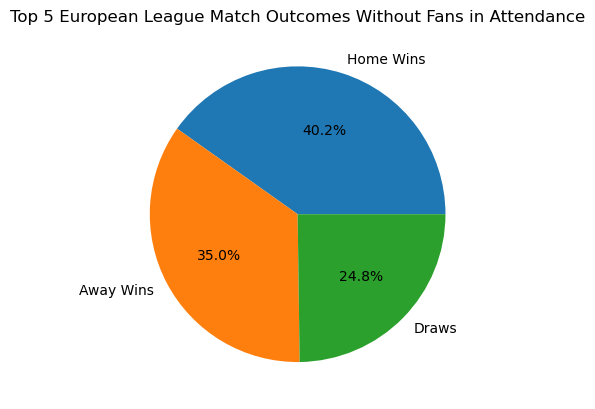

In [15]:
# Calculate % occurance of win/loss/draw
home_win_pct_2 = (len(home_wins_2_df)/len(covid_season_df['Home Score']))
away_win_pct_2 = (len(away_wins_2_df)/len(covid_season_df['Home Score']))
draw_pct_2 = (len(draws_2_df)/len(covid_season_df['Home Score']))

# Generate pie chart to display results
labels =  ['Home Wins', 'Away Wins', 'Draws']
values = home_win_pct_2, away_win_pct_2, draw_pct_2 

plt.title("Top 5 European League Match Outcomes Without Fans in Attendance")
plt.pie(values, labels=labels ,autopct='%1.1f%%')
plt.show()

In [16]:
# Create new column for total goals in each match
all_leagues_matches_cleaned_df["Total Goals"] = all_leagues_matches_cleaned_df["Home Score"].astype(float) + all_leagues_matches_cleaned_df["Away Score"].astype(float)
all_leagues_matches_cleaned_df.head()

,Season,Wk,Date,Time,Home,Away,Home Score,Away Score,xG Home,xG Away,Attendance,Venue,Referee,xG Diff,Actual Diff,League,Round,Total Goals
0,2017-2018,1.0,2017-08-11,19:45,Arsenal,Leicester City,4.0,3.0,2.5,1.5,59387.0,Emirates Stadium,Mike Dean,1.0,1.0,EPL,NaN,7.0
1,2017-2018,1.0,2017-08-12,12:30,Watford,Liverpool,3.0,3.0,2.1,2.6,20407.0,Vicarage Road Stadium,Anthony Taylor,-0.5,0.0,EPL,NaN,6.0
2,2017-2018,1.0,2017-08-12,15:00,Crystal Palace,Huddersfield,0.0,3.0,1.1,1.5,25448.0,Selhurst Park,Jonathan Moss,-0.4,-3.0,EPL,NaN,3.0
3,2017-2018,1.0,2017-08-12,15:00,West Brom,Bournemouth,1.0,0.0,1.3,0.5,25011.0,The Hawthorns,Robert Madley,0.8,1.0,EPL,NaN,1.0
4,2017-2018,1.0,2017-08-12,15:00,Chelsea,Burnley,2.0,3.0,1.5,0.6,41616.0,Stamford Bridge,Craig Pawson,0.9,-1.0,EPL,NaN,5.0


In [17]:
# Calculate quartiles & U/L bounds for potential outliers
quartiles = all_leagues_matches_cleaned_df["Total Goals"].quantile([0.25,0.5,0.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3-Q1

upper_bound = Q3 + (IQR*1.5)
lower_bound = Q1 - (IQR*1.5)

print(upper_bound)
print(lower_bound)



7.0
-1.0


In [18]:
# Get matches where final score is considered an outlier
outliers = all_leagues_matches_cleaned_df.loc[(all_leagues_matches_cleaned_df['Total Goals'] < lower_bound) | 
                                     (all_leagues_matches_cleaned_df['Total Goals] > upper_bound), :]

len(outliers)

SyntaxError: EOL while scanning string literal (1712542368.py, line 3)

(-3.0, 15.0)

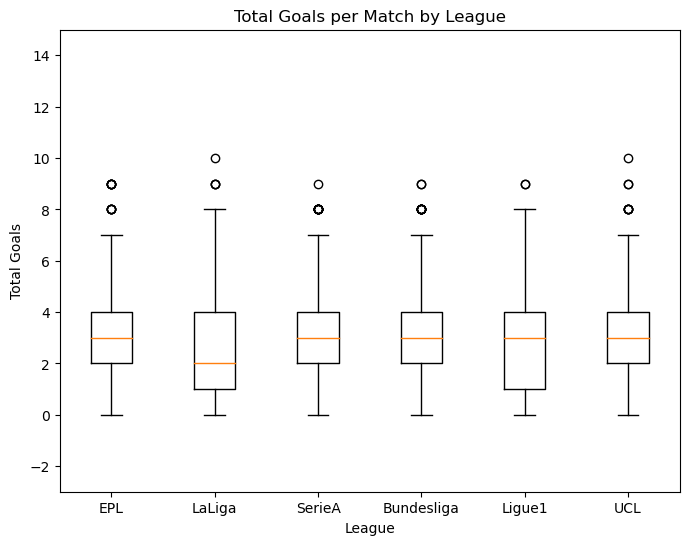

In [19]:
# Generate a box plot showing goal differential in every match over the past 5 years
data = [all_leagues_matches_cleaned_df[all_leagues_matches_cleaned_df['League'] == 'EPL']['Total Goals'],
        all_leagues_matches_cleaned_df[all_leagues_matches_cleaned_df['League'] == 'La Liga']['Total Goals'],
        all_leagues_matches_cleaned_df[all_leagues_matches_cleaned_df['League'] == 'Serie A']['Total Goals'],
        all_leagues_matches_cleaned_df[all_leagues_matches_cleaned_df['League'] == 'Bundesliga']['Total Goals'],
        all_leagues_matches_cleaned_df[all_leagues_matches_cleaned_df['League'] == 'Ligue1']['Total Goals'],
        all_leagues_matches_cleaned_df[all_leagues_matches_cleaned_df['League'] == 'UEFA']['Total Goals']]

league= ['EPL', 'LaLiga','SerieA','Bundesliga', 'Ligue1', 'UCL']

fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_title('Total Goals per Match by League')
ax1.set_ylabel('Total Goals')
ax1.set_xlabel('League')
ax1.boxplot(data, labels=league, widths = 0.4,vert=True)
plt.ylim(-3, 15)

In [20]:
# Remove comma from wages column to allow for conversion to float
all_leagues_sum_df['Annual Wages ($)'] = all_leagues_sum_df['Annual Wages ($)'].astype(str)
all_leagues_sum_df['Annual Wages ($)'] = all_leagues_sum_df['Annual Wages ($)'].map(lambda x: x.replace(',', ''))
all_leagues_sum_df['Annual Wages ($)'] = all_leagues_sum_df['Annual Wages ($)'].astype(float)
all_leagues_sum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            486 non-null    object 
 1   League Rank       474 non-null    float64
 2   Squad             486 non-null    object 
 3   # of Players      474 non-null    float64
 4   Avg Age           486 non-null    float64
 5   Avg Poss          486 non-null    float64
 6   MP                486 non-null    int64  
 7   W                 486 non-null    int64  
 8   D                 486 non-null    int64  
 9   L                 486 non-null    int64  
 10  GF                486 non-null    int64  
 11  GA                486 non-null    int64  
 12  GD                486 non-null    int64  
 13  Pts               486 non-null    int64  
 14  Pts/MP            486 non-null    float64
 15  xG                486 non-null    float64
 16  xGA               486 non-null    float64
 1

In [21]:
# Groupby team name & get mean for all relevant variables
squads_grouped = all_leagues_sum_df.groupby(['Squad'])

mean_age = squads_grouped['Avg Age'].mean()
mean_wages = squads_grouped['Annual Wages ($)'].mean()
mean_poss = squads_grouped['Avg Poss'].mean()
mean_attendance = squads_grouped['Attendance'].mean()
mean_pts = squads_grouped['Pts'].mean()
mean_GF = squads_grouped['GF'].mean()
mean_GA = squads_grouped['GA'].mean()
mean_xG = squads_grouped['xG'].mean()
mean_xGA = squads_grouped['xGA'].mean()
mean_xGD = squads_grouped['xGD'].mean()
mean_GD = squads_grouped['GD'].mean()

In [22]:
# Create dict to hold variables
mean_sum ={
    "Age": mean_age,
    "Possession": mean_poss,
    "Attendance": mean_attendance,
    "Points": mean_pts,
    "Goals For": mean_GF,
    "Goals Against": mean_GA,
    "xGoals For": mean_xG,
    "xGoals Against": mean_xGA,
    "Goal Differential": mean_GD,
    "xGoal Differential": mean_xGD,
    "Avg Wages": mean_wages}

# Create new df from dict
mean_sum_df = pd.DataFrame(mean_sum)

In [23]:
# Round values to 2 decimal places & display df
mean_sum_df = mean_sum_df.round(2)
mean_sum_df

,Age,Possession,Attendance,Points,Goals For,Goals Against,xGoals For,xGoals Against,Goal Differential,xGoal Differential,Avg Wages
Squad,,,,,,,,,,,
Alavés,27.28,41.86,14817.25,41.00,36.00,56.20,39.76,54.76,-20.20,-15.00,2.237093e+07
Amiens,27.50,43.30,9521.00,45.00,37.00,42.00,32.80,54.90,-5.00,-22.10,1.256564e+07
Angers,27.10,45.10,11065.00,41.00,42.00,52.00,47.60,45.80,-10.00,1.80,1.032360e+07
Arminia,25.90,41.50,8547.00,31.50,26.50,52.50,29.60,59.80,-26.00,-30.25,1.030322e+07
Arsenal,25.92,55.92,45421.60,63.80,63.80,47.40,57.54,49.20,16.40,8.36,1.638060e+08
...,...,...,...,...,...,...,...,...,...,...,...
Werder Bremen,26.60,48.05,26765.00,39.25,43.25,53.75,40.25,52.45,-10.50,-12.23,3.435884e+07
West Brom,27.75,39.30,12401.50,28.50,33.00,66.00,36.15,57.90,-33.00,-21.70,5.841702e+07
West Ham,27.80,45.80,43675.60,50.80,54.20,56.60,47.94,56.60,-2.40,-8.66,8.940771e+07


In [24]:
# Calculate average dollars spent per point earned for each team
dollars_per_point = (mean_sum_df['Avg Wages'] / 100000) / mean_sum_df['Points']
print(dollars_per_point)

Squad
Alavés            5.456324
Amiens            2.792366
Angers            2.517952
Arminia           3.270863
Arsenal          25.674919
                   ...    
Werder Bremen     8.753845
West Brom        20.497200
West Ham         17.599943
Wolfsburg        13.166656
Wolves           11.470129
Length: 128, dtype: float64


In [25]:
# Calculate dollars spent per point earned & get top 20 teams by this metric
mean_sum_df['Dollars Spent per Point (Thousands)'] = dollars_per_point
mean_sum_df = mean_sum_df.sort_values('Dollars Spent per Point (Thousands)', ascending=False)
mean_sum_df.head(20)

,Age,Possession,Attendance,Points,Goals For,Goals Against,xGoals For,xGoals Against,Goal Differential,xGoal Differential,Avg Wages,Dollars Spent per Point (Thousands)
Squad,,,,,,,,,,,,
Real Madrid,27.48,59.66,53742.75,80.2,74.80,34.80,70.64,41.02,40.00,29.62,2.916186e+08,36.361422
Barcelona,27.16,64.66,62862.75,82.8,85.60,35.80,72.50,40.14,49.80,32.36,2.977600e+08,35.961350
Manchester Utd,26.12,54.72,56113.00,69.0,65.80,43.80,59.04,44.70,22.00,14.34,2.224331e+08,32.236683
Bayern Munich,27.12,64.42,48108.80,79.8,95.20,34.60,83.16,34.66,60.60,48.52,2.146003e+08,26.892263
Arsenal,25.92,55.92,45421.60,63.8,63.80,47.40,57.54,49.20,16.40,8.36,1.638060e+08,25.674919
Chelsea,26.58,60.32,30142.20,69.8,65.60,40.00,61.60,34.46,25.60,27.14,1.756046e+08,25.158247
Fulham,25.60,49.25,12291.00,27.0,30.50,67.00,40.90,60.40,-36.50,-19.45,6.263726e+07,23.198984
Paris S-G,26.10,66.30,46930.00,93.0,108.00,29.00,86.10,34.30,79.00,51.70,2.064353e+08,22.197349
Everton,26.18,46.48,29100.40,50.0,46.40,54.80,45.58,50.38,-8.40,-4.82,1.078747e+08,21.574940


In [26]:
# Get bottom 20 teams by dollars spent per points earned
mean_sum_df.tail(20)

,Age,Possession,Attendance,Points,Goals For,Goals Against,xGoals For,xGoals Against,Goal Differential,xGoal Differential,Avg Wages,Dollars Spent per Point (Thousands)
Squad,,,,,,,,,,,,
Osasuna,27.77,45.83,14280.0,47.67,40.0,51.0,41.60,47.83,-11.0,-6.17,19098153.33,4.006325
Saint-Étienne,26.60,51.30,27563.0,55.00,47.0,50.0,51.00,54.10,-3.0,-3.10,20871408.00,3.794801
Girona,26.45,47.40,10686.0,44.00,43.5,56.0,47.05,51.55,-12.5,-4.50,16376107.50,3.721843
Bordeaux,25.10,50.60,26048.0,55.00,53.0,48.0,51.00,43.60,5.0,7.50,19977645.00,3.632299
Freiburg,25.94,46.64,16721.0,44.00,47.2,52.4,44.62,53.64,-5.2,-9.02,15936971.20,3.622039
Paderborn 07,25.70,45.90,11038.0,20.00,37.0,74.0,39.20,67.30,-37.0,-28.10,7143974.00,3.571987
Empoli,25.45,47.65,7988.0,39.50,50.5,70.0,48.65,64.80,-19.5,-16.25,14064758.00,3.560698
Bochum,28.00,44.70,14236.0,42.00,38.0,52.0,40.60,55.80,-14.0,-15.10,13768197.00,3.278142
Arminia,25.90,41.50,8547.0,31.50,26.5,52.5,29.60,59.80,-26.0,-30.25,10303219.50,3.270863


Text(0, 0.5, 'Wages in $ Millions')

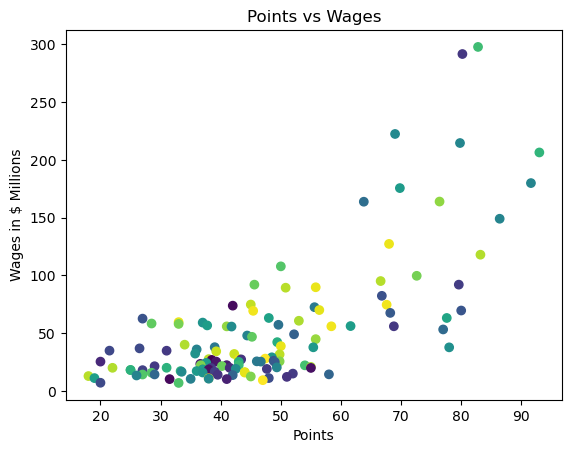

In [27]:
# Plot Points vs Wages
x_axis = mean_sum_df["Points"]
y_axis = (mean_sum_df["Avg Wages"] / 1000000)
colors = np.random.rand(len(mean_sum_df["Points"]))
fig1, ax1 = plt.subplots()
plt.title('Points vs Wages')
plt.scatter(x_axis, y_axis,c=colors, cmap='viridis')
plt.xlabel('Points')
plt.ylabel('Wages in $ Millions')

Text(0, 0.5, 'Possesstion (%)')

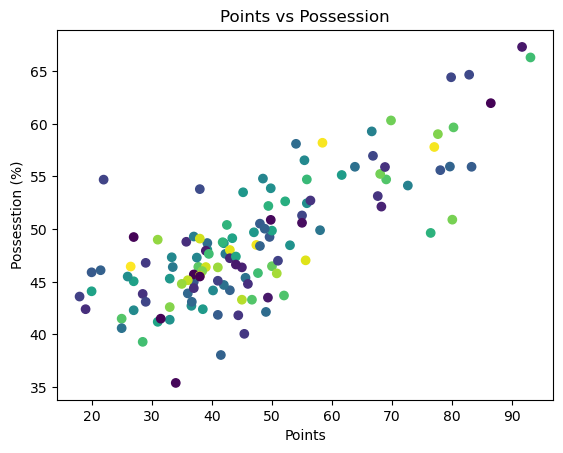

In [28]:
# Plot Points vs Possesion
x_axis = mean_sum_df["Points"]
y_axis = mean_sum_df["Possession"]
colors = np.random.rand(len(mean_sum_df["Points"]))
fig1, ax1 = plt.subplots()
plt.title('Points vs Possession')
plt.scatter(x_axis, y_axis,c=colors, cmap='viridis')
plt.xlabel('Points')
plt.ylabel('Possesstion (%)')

Text(0, 0.5, 'xGoals For')

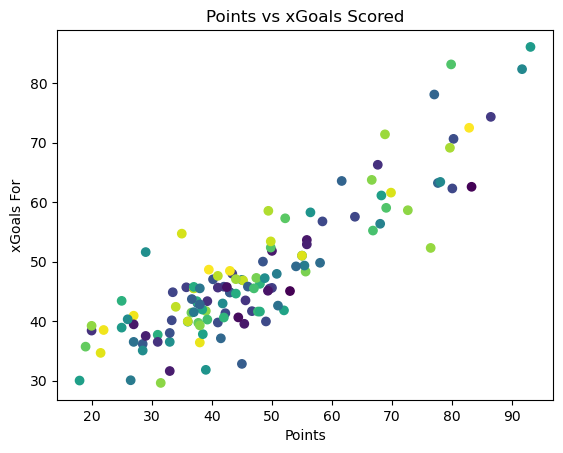

In [29]:
# Plot points vs xGoals Scored
x_axis = mean_sum_df["Points"]
y_axis = mean_sum_df["xGoals For"]
colors = np.random.rand(len(mean_sum_df["Points"]))
fig1, ax1 = plt.subplots()
plt.title('Points vs xGoals Scored')
plt.scatter(x_axis, y_axis,c=colors, cmap='viridis')
plt.xlabel('Points')
plt.ylabel('xGoals For')

(20.0, 100.0)

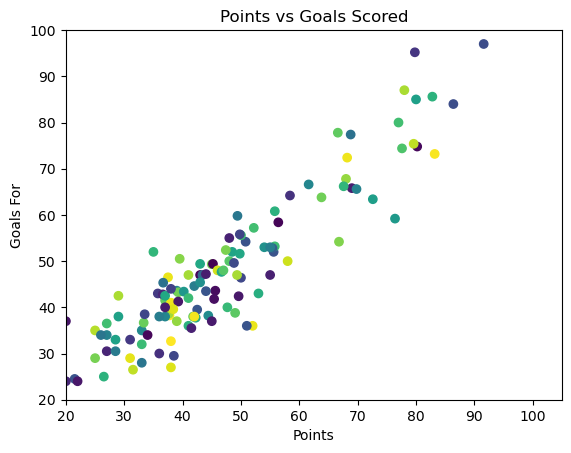

In [30]:
# Plot points vs actual goals scored
x_axis = mean_sum_df["Points"]
y_axis = mean_sum_df["Goals For"]
colors = np.random.rand(len(mean_sum_df["Points"]))
fig1, ax1 = plt.subplots()
plt.title('Points vs Goals Scored')
plt.scatter(x_axis, y_axis, c=colors, cmap='viridis')
plt.xlabel('Points')
plt.ylabel('Goals For')
plt.xlim(20,105)
plt.ylim(20,100)

Text(0, 0.5, 'xGoals Against')

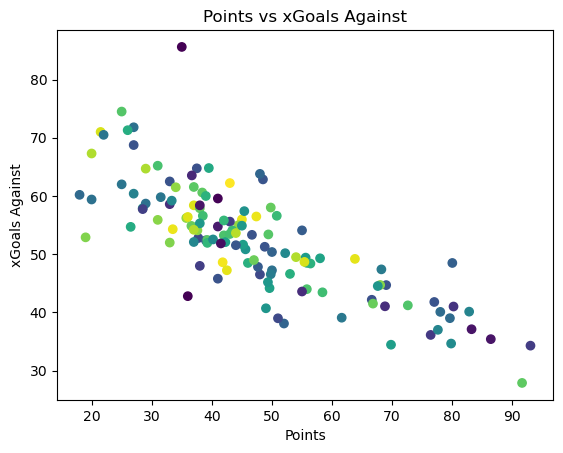

In [31]:
# Plot points vs xGoals Against
x_axis = mean_sum_df["Points"]
y_axis = mean_sum_df["xGoals Against"]
colors = np.random.rand(len(mean_sum_df["Points"]))
fig1, ax1 = plt.subplots()
plt.title('Points vs xGoals Against')
plt.scatter(x_axis, y_axis,c=colors, cmap='viridis')
plt.xlabel('Points')
plt.ylabel('xGoals Against')

Text(0, 0.5, 'Goals Against')

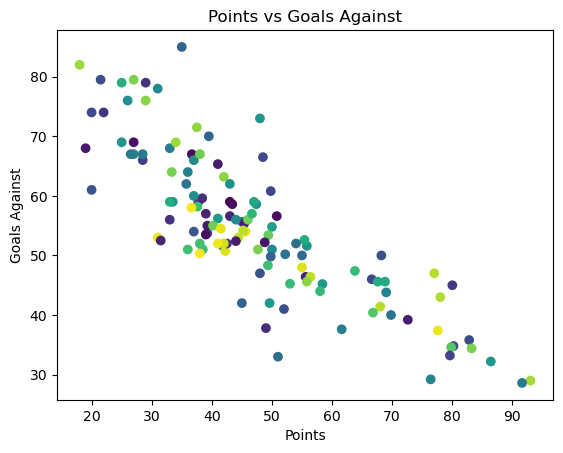

In [32]:
# Plot points vs actual goals against
x_axis = mean_sum_df["Points"]
y_axis = mean_sum_df["Goals Against"]
colors = np.random.rand(len(mean_sum_df["Points"]))
fig1, ax1 = plt.subplots()
plt.title('Points vs Goals Against')
plt.scatter(x_axis, y_axis,c=colors, cmap='viridis')
plt.xlabel('Points')
plt.ylabel('Goals Against')

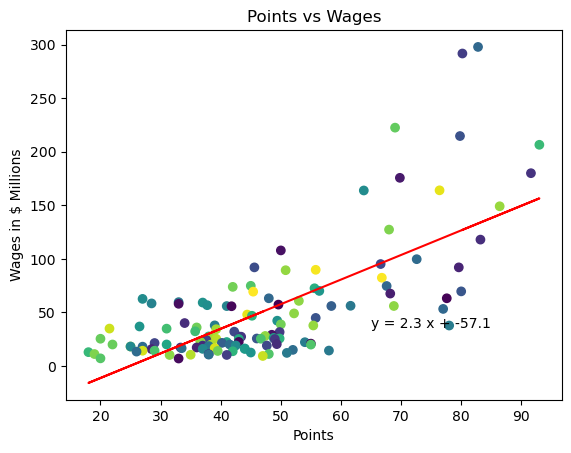

 r^2 = 0.5


In [33]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_sum_df["Points"], (mean_sum_df["Avg Wages"] / 1000000))
regress_values= slope* mean_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

colors = np.random.rand(len(mean_sum_df["Points"]))
plt.scatter(mean_sum_df["Points"], (mean_sum_df["Avg Wages"] / 1000000),c=colors, cmap='viridis')
plt.plot(mean_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("Wages in $ Millions")
plt.title("Points vs Wages")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

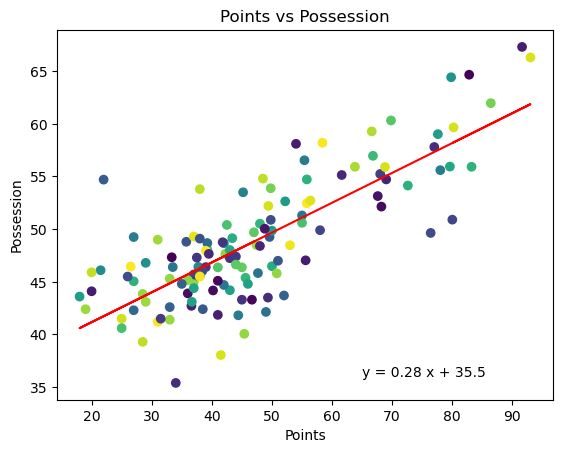

 r^2 = 0.62


In [34]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_sum_df["Points"], mean_sum_df["Possession"])
regress_values= slope* mean_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

colors = np.random.rand(len(mean_sum_df["Points"]))
plt.scatter(mean_sum_df["Points"], mean_sum_df["Possession"],c=colors, cmap='viridis')
plt.plot(mean_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("Possession")
plt.title("Points vs Possession")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

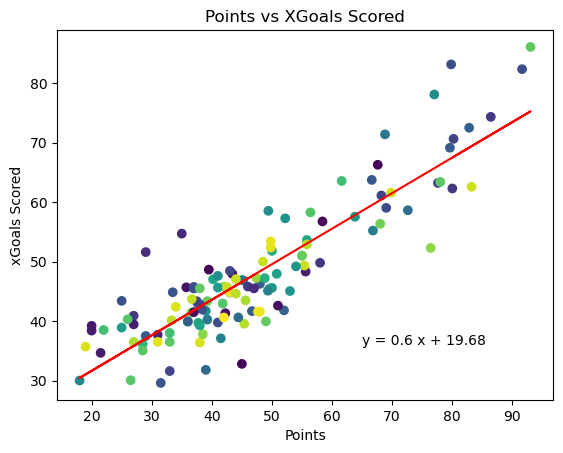

 r^2 = 0.78


In [35]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_sum_df["Points"], mean_sum_df["xGoals For"])
regress_values= slope* mean_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

colors = np.random.rand(len(mean_sum_df["Points"]))
plt.scatter(mean_sum_df["Points"], mean_sum_df["xGoals For"],c=colors, cmap='viridis')
plt.plot(mean_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("xGoals Scored")
plt.title("Points vs XGoals Scored")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

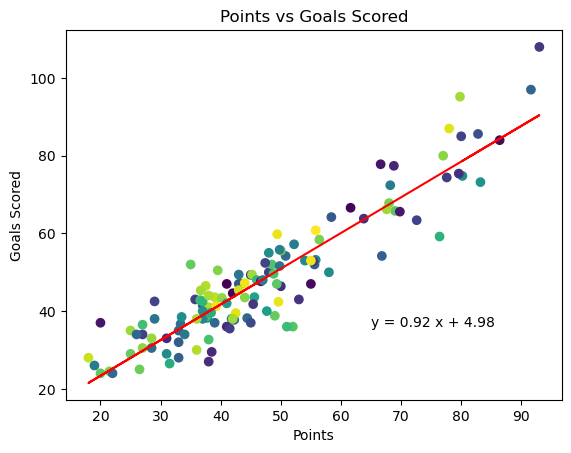

 r^2 = 0.85


In [36]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_sum_df["Points"], mean_sum_df["Goals For"])
regress_values= slope* mean_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

colors = np.random.rand(len(mean_sum_df["Points"]))
plt.scatter(mean_sum_df["Points"], mean_sum_df["Goals For"],c=colors, cmap='viridis')
plt.plot(mean_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("Goals Scored")
plt.title("Points vs Goals Scored")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

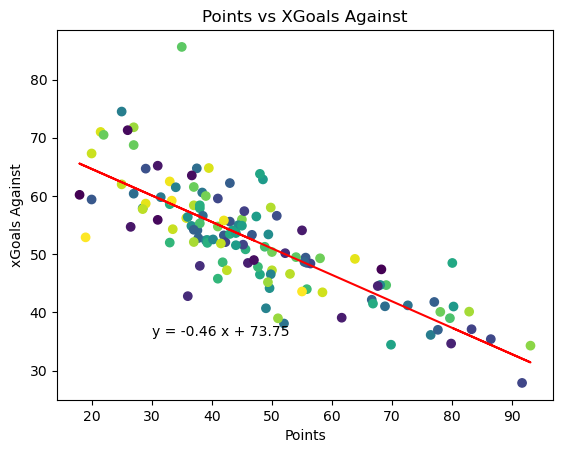

 r^2 = 0.64


In [37]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_sum_df["Points"], mean_sum_df["xGoals Against"])
regress_values= slope* mean_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

colors = np.random.rand(len(mean_sum_df["Points"]))
plt.scatter(mean_sum_df["Points"], mean_sum_df["xGoals Against"],c=colors, cmap='viridis')
plt.plot(mean_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(30,36))
plt.xlabel("Points")
plt.ylabel("xGoals Against")
plt.title("Points vs XGoals Against")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

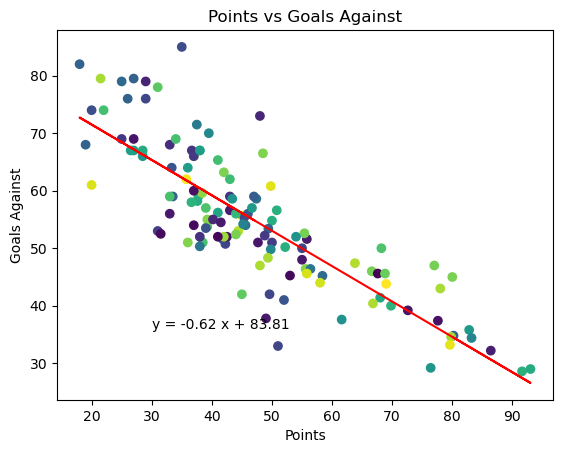

 r^2 = 0.7


In [38]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_sum_df["Points"], mean_sum_df["Goals Against"])
regress_values= slope* mean_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

colors = np.random.rand(len(mean_sum_df["Points"]))
plt.scatter(mean_sum_df["Points"], mean_sum_df["Goals Against"],c=colors, cmap='viridis')
plt.plot(mean_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(30,36))
plt.xlabel("Points")
plt.ylabel("Goals Against")
plt.title("Points vs Goals Against")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

In [39]:
# Groupby league & get average values for relevant variables
league_grouped = all_leagues_sum_df.groupby(['League'])

mean_age = league_grouped['Avg Age'].mean()
mean_wages = league_grouped['Annual Wages ($)'].mean()
mean_poss = league_grouped['Avg Poss'].mean()
mean_attendance = league_grouped['Attendance'].mean()
mean_pts = league_grouped['Pts'].mean()
mean_GF = league_grouped['GF'].mean()
mean_GA = league_grouped['GA'].mean()
mean_xG = league_grouped['xG'].mean()
mean_xGA = league_grouped['xGA'].mean()
mean_xGD = league_grouped['xGD'].mean()
mean_GD = league_grouped['GD'].mean()

In [40]:
# Create dict to hold variables
league_grouped_sum ={
    "Age": mean_age,
    "Possession": mean_poss,
    "Attendance": mean_attendance,
    "Points": mean_pts,
    "Goals For": mean_GF,
    "Goals Against": mean_GA,
    "xGoals For": mean_xG,
    "xGoals Against": mean_xGA,
    "Goal Differential": mean_GD,
    "xGoal Differential": mean_xGD,
    "Avg Wages": mean_wages}
    

# Create new df from dict
league_grouped_sum_df = pd.DataFrame(league_grouped_sum)
league_grouped_sum_df.head()

,Age,Possession,Attendance,Points,Goals For,Goals Against,xGoals For,xGoals Against,Goal Differential,xGoal Differential,Avg Wages
League,,,,,,,,,,,
Bundesliga,25.922727,50.076136,27556.954545,47.181818,52.465909,51.897727,50.180682,49.713636,0.568182,0.473864,4.962603e+07
EPL,26.720000,50.000000,29258.510000,52.670000,52.190000,52.190000,50.093000,50.096000,0.000000,-0.002000,9.775193e+07
La Liga,27.181633,50.142857,23651.280488,51.948980,48.795918,48.561224,48.743878,48.662245,0.234694,0.086735,7.034345e+07
Ligue1,25.995000,49.995000,22398.350000,52.200000,51.650000,51.650000,49.565000,49.575000,0.000000,-0.010000,3.021376e+07
Serie A,26.943000,49.999000,17102.530000,52.270000,54.420000,54.420000,52.007000,52.011000,0.000000,0.002000,4.363337e+07


(16.0, 30.0)

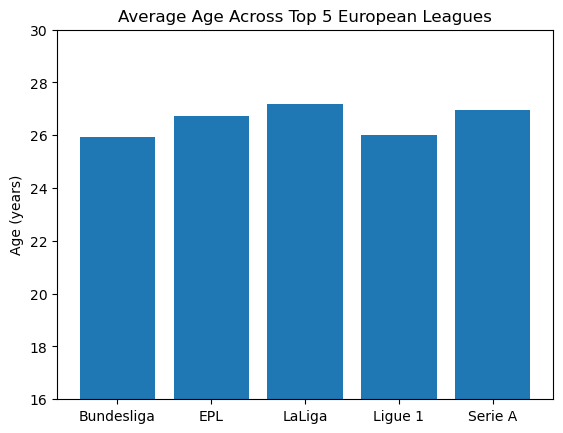

In [41]:
# Plot age across each league
y_axis = league_grouped_sum_df['Age']
x_axis = ['Bundesliga', 'EPL','LaLiga','Ligue 1', 'Serie A']
plt.bar(x_axis, y_axis)
plt.title('Average Age Across Top 5 European Leagues')
plt.ylabel('Age (years)')
plt.ylim(16,30)

Text(0, 0.5, 'Wages in $ Millions')

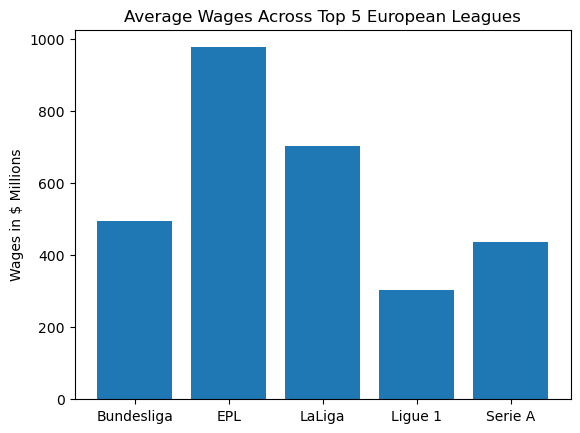

In [42]:
# Plot wages across each league
y_axis = (league_grouped_sum_df['Avg Wages'] / 100000)
x_axis = ['Bundesliga', 'EPL','LaLiga','Ligue 1', 'Serie A']
plt.bar(x_axis, y_axis)
plt.title('Average Wages Across Top 5 European Leagues')
plt.ylabel('Wages in $ Millions')

In [43]:
# Groupby season
year_grouped = all_leagues_sum_df.groupby(['League', 'Season']).agg({'GF': 'sum', 'Annual Wages ($)': 'mean'})
year_grouped

GF  Annual Wages ($)
League     Season                           
Bundesliga 2017-2018   811      4.620808e+07
           2018-2019   942      5.129115e+07
           2019-2020   982      5.394498e+07
           2020-2021   928      5.053548e+07
           2021-2022   954      4.605309e+07
EPL        2017-2018  1018      9.202020e+07
           2018-2019  1072      9.747985e+07
           2019-2020  1034      9.448564e+07
           2020-2021  1024      1.012749e+08
           2021-2022  1071      1.034991e+08
La Liga    2017-2018   990      5.610859e+07
           2018-2019   946      7.013623e+07
           2019-2020   942      7.381299e+07
           2020-2021   953      7.742880e+07
           2021-2022   951      7.350853e+07
Ligue1     2017-2018  1033      3.021376e+07
           2018-2019  1033      3.021376e+07
           2019-2020  1033      3.021376e+07
           2020-2021  1033      3.021376e+07
           2021-2022  1033      3.021376e+07
Serie A    2017-2018  1017      4.363337e+07
           2018-2019  1019      4.363337e+07
           2019-2020  1154      4.363337e+07
           2020-2021  1163      4.363337e+07
           2021-2022  1089      4.363337e+07

In [44]:
# Remove multi-index
year_grouped = year_grouped.reset_index().rename(columns={'level_0': 'League', 'level_1': 'Season'})
year_grouped

,League,Season,GF,Annual Wages ($)
0,Bundesliga,2017-2018,811,4.620808e+07
1,Bundesliga,2018-2019,942,5.129115e+07
2,Bundesliga,2019-2020,982,5.394498e+07
3,Bundesliga,2020-2021,928,5.053548e+07
4,Bundesliga,2021-2022,954,4.605309e+07
5,EPL,2017-2018,1018,9.202020e+07
6,EPL,2018-2019,1072,9.747985e+07
7,EPL,2019-2020,1034,9.448564e+07
8,EPL,2020-2021,1024,1.012749e+08
9,EPL,2021-2022,1071,1.034991e+08


Text(0, 0.5, ' Average Wages in $Billions')

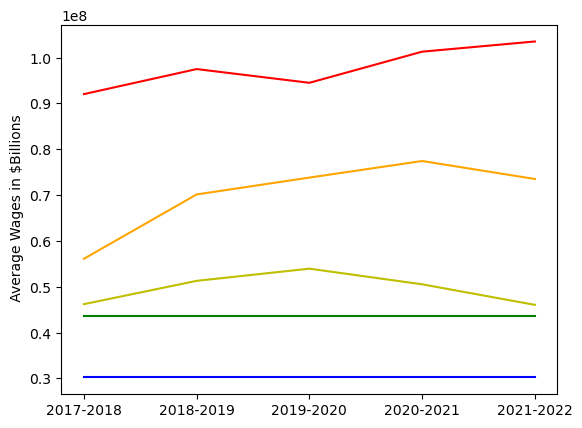

In [45]:
# Plot goals scored in each league over the past 5 seasons
x_axis_bundes = year_grouped[year_grouped['League'] == 'Bundesliga']['Season']
y_axis_bundes = year_grouped[year_grouped['League'] == 'Bundesliga']['Annual Wages ($)']
plt.plot(x_axis_bundes, y_axis_bundes, color='y')

x_axis_EPL = year_grouped[year_grouped['League'] == 'EPL']['Season']
y_axis_EPL = year_grouped[year_grouped['League'] == 'EPL']['Annual Wages ($)']
plt.plot(x_axis_EPL, y_axis_EPL, color='r')

x_axis_LaLiga = year_grouped[year_grouped['League'] == 'La Liga']['Season']
y_axis_LaLiga = year_grouped[year_grouped['League'] == 'La Liga']['Annual Wages ($)']
plt.plot(x_axis_LaLiga, y_axis_LaLiga, color='orange')

x_axis_serieA = year_grouped[year_grouped['League'] == 'Serie A']['Season']
y_axis_serieA = year_grouped[year_grouped['League'] == 'Serie A']['Annual Wages ($)']
plt.plot(x_axis_serieA, y_axis_serieA, color='green')

x_axis_ligue1 = year_grouped[year_grouped['League'] == 'Ligue1']['Season']
y_axis_ligue1 = year_grouped[year_grouped['League'] == 'Ligue1']['Annual Wages ($)']
plt.plot(x_axis_ligue1, y_axis_ligue1, color='b')
plt.ylabel(' Average Wages in $Billions')